In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
lda_train = pd.read_csv('/content/drive/MyDrive/Ybigta/신입기수 프로젝트/for LDA/train_data_lda.csv')
lda_train.head()

,Unnamed: 0,row_num,location,cafe_name,review,label,new_review,preprocessed,category
0,0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,4,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...,unlabeled
1,1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,3,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",우유 크림 개 맛있다 혼잡하다 또 곳,unlabeled
2,2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,2,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...,unlabeled
3,3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,4,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못,unlabeled
4,5,5,강남역,카페노티드 청담,바닐라맛 맛있어요! 도넛 사는데.. 40분? 기다린거 같네요 . 이왕 간김에 조각 ...,4,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...,unlabeled


In [5]:
corpus = []
stop_w = ['최고','하나','별로','있다', '없다', '진짜','좋다','카페' ,'이다', '좋다','아니다', '좀','같다','금방']

for i in lda_train.preprocessed:
  sub1 = re.sub('라떼|라테|아메리카노', '커피', i)
  sub2 = re.sub('케이크|스콘|마카롱', '디저트', sub1)
  inner = []
  for t in sub2.split(' '):
    if t not in stop_w:
      inner.append(t)
  corpus.append(' '.join(inner))

corpus[:10]

['그냥 그렇다 생각 다른 곳 넛 킹 드 이유 그냥 갤러리아 지하 게 갑자기 확장 이전 웨이 팅 뭐',
 '우유 크림 개 맛있다 혼잡하다 또 곳',
 '도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 느리다 이해 안',
 '도넛 맛 엉 어어 무길 예약 거 절대 못',
 '바닐라 맛 맛있다 도 넛 분 거 이 왕관 김 조각 디저트 사고 살라 다시 줄 못 사서 아쉽다 이 점 개선 꼭 부탁드리다',
 '도넛 맛 맛있다 대신 포장 거 인내심 가야 함 뭔가 포장 방식 거',
 '계산 직원 불친절하다 프로도 두 개시 집 어보 개 안 예정',
 '빵 더 맛있다 저렴하다 데 매장 분위기 직원 끼리 소통 안 느낌 아쉽다 계산 때 빵 디저트 미리 말씀',
 '안 더 거 줄 정리 빨',
 '노 티스 맛있다']

# LDA 모델링은 여기서부터~ 

In [9]:
corpus_gen = []
for i in corpus:
  inner = i.split(' ')
  corpus_gen.append(inner)


corpus_gen[:2]

[['그냥',
  '그렇다',
  '생각',
  '다른',
  '곳',
  '넛',
  '킹',
  '드',
  '이유',
  '그냥',
  '갤러리아',
  '지하',
  '게',
  '갑자기',
  '확장',
  '이전',
  '웨이',
  '팅',
  '뭐'],
 ['우유', '크림', '개', '맛있다', '혼잡하다', '또', '곳']]

In [10]:
!pip install gensim
from gensim import models
import gensim

In [12]:
from gensim import corpora
dictionary = corpora.Dictionary(corpus_gen)
corpus = [dictionary.doc2bow(text) for text in corpus_gen]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


# Coherence 시각화 코드

In [19]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

coherence_values=[]
for i in range(2,7):
  ldamodel = gensim.models.LdaModel(corpus, num_topics = i, id2word=dictionary, passes = 100)
  coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus_gen, dictionary=dictionary, topn=10)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

In [20]:
for i in range(len(coherence_values)):
  print(coherence_values[i])

0.43000222646373154
0.42062936826606684
0.44306530415853557
0.4379561296194738
0.44474007087578254


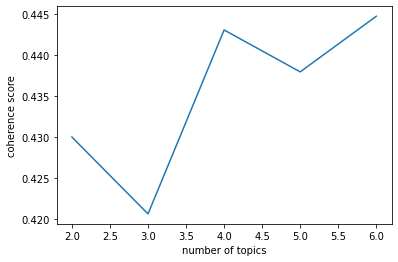

In [21]:
x=range(2,7)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

##Perplexity 시각화 코드

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

perplexity_values=[]
for i in range(2,7):
  ldamodel = gensim.models.LdaModel(corpus, num_topics = i, id2word=dictionary, passes = 100)
  perplexity_values.append(ldamodel.log_perplexity(corpus))

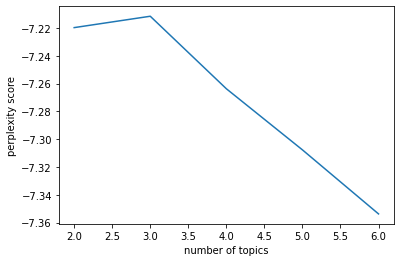

In [23]:
x=range(2,7)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()